In [2]:
import os, pickle, copy
import numpy as np
from numpy import log, sum, exp, prod
from numpy.random import beta, binomial, dirichlet, uniform, gamma, seed, multinomial
#from scipy.stats import multinomial
from imp import reload
import matplotlib.pyplot as plt

os.chdir("C:\\Users\\Alexander\\Documents\\\Github\\bmm_mix")
#os.getcwd()

In [3]:
from bernmix.utils import bmm_utils as bmm
reload(bmm)

<module 'bernmix.utils.bmm_utils' from 'C:\\Users\\Alexander\\Documents\\Github\\bmm_mix\\bernmix\\utils\\bmm_utils.py'>

Simulate data from data generating process:

In [5]:
#seed(12)

N = 2000        # number of observations  
K = 3           # number of mixture components
D = 10           # dimensions / number of features     

# True states of unknown parameters:
alphas = gamma(shape=1, size=K)               # shape parameter
p_true = dirichlet(alpha = alphas, size = 1)[0]
p_true
theta_true = beta(a = .7, b = .9, size = K*D).reshape(D,K)

# Generate data from mixture model:
#------------------------------------
X, Z = bmm.sample_bmm(N, p_true, theta_true)


Sampling from 10 dimensional Bernoulli mixture with 3 mixture components.
Number of random draws: 2000


Set initial values for parameters:

In [6]:
#seed(12)
D = X.shape[1]

#alphas = gamma(shape=1, size=K)               # shape parameters
#p_0 = dirichlet(alpha = alphas, size = 1)[0]
p_0 = np.array([1/K]*K)  # K>2
theta_0 = beta(a = 1, b = 1, size = K*D).reshape(D,K)


Run EM algorithm:

In [7]:
logli, p_em, theta_em = bmm.mixture_EM(X = X, p_0 = p_0, theta_0 = theta_0, n_iter = 300, stopcrit = 10**(-4))


0 - delta LL.: 8161.439962698152
1 - delta LL.: 47.388500827561074
2 - delta LL.: 21.08738039090167
3 - delta LL.: 12.538596993443207
4 - delta LL.: 7.214899217513448
5 - delta LL.: 3.963218853190483
6 - delta LL.: 2.2539550626916025
7 - delta LL.: 1.4087541942517419
8 - delta LL.: 0.9858247956872219
9 - delta LL.: 0.7651072680073412
10 - delta LL.: 0.6424832146549306
11 - delta LL.: 0.5682482201027597
12 - delta LL.: 0.5184729641896411
13 - delta LL.: 0.4815338532334863
14 - delta LL.: 0.4516794758819742
15 - delta LL.: 0.42598115297369077
16 - delta LL.: 0.40289605723592103
17 - delta LL.: 0.3815832497766678
18 - delta LL.: 0.3615690035494481
19 - delta LL.: 0.3425765339288773
20 - delta LL.: 0.3244358645169996
21 - delta LL.: 0.30703478645227733
22 - delta LL.: 0.29029212977548013
23 - delta LL.: 0.2741437599506753
24 - delta LL.: 0.2585360167267936
25 - delta LL.: 0.24342344257092918
26 - delta LL.: 0.22876879403520434
27 - delta LL.: 0.21454401560367842
28 - delta LL.: 0.200731311

227 - delta LL.: 0.00011751220699807163
228 - delta LL.: 0.00011767030810005963
229 - delta LL.: 0.00011784197704400867
230 - delta LL.: 0.00011802714107034262
231 - delta LL.: 0.00011822575106634758
232 - delta LL.: 0.00011843775064335205
233 - delta LL.: 0.00011866312343045138
234 - delta LL.: 0.00011890183304785751
235 - delta LL.: 0.00011915387767658103
236 - delta LL.: 0.00011941925185965374
237 - delta LL.: 0.00011969796469202265
238 - delta LL.: 0.00011999003982055001
239 - delta LL.: 0.00012029549907310866
240 - delta LL.: 0.00012061438246746548
241 - delta LL.: 0.00012094673729734495
242 - delta LL.: 0.0001212926181324292
243 - delta LL.: 0.00012165208681835793
244 - delta LL.: 0.0001220252197526861
245 - delta LL.: 0.00012241209697094746
246 - delta LL.: 0.00012281280214665458
Local optimum reached.
0.00012281280214665458


Plot log-likelihood:

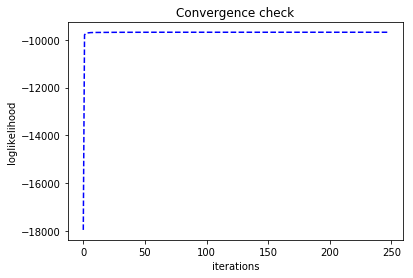

In [9]:
plt.plot(logli, 'b--')
plt.title("Convergence check")
plt.xlabel('iterations')
plt.ylabel('loglikelihood')
plt.show()

Compare estimates with true parameters:

In [11]:
print(p_em)
print(p_true)

[0.67508675 0.29874974 0.02616351]
[0.97135904 0.0070658  0.02157515]


In [12]:
print(theta_em)

print(theta_true)

[[4.15489614e-02 1.46016934e-02 1.56270882e-01]
 [7.87666523e-01 8.15922898e-01 4.49904927e-07]
 [2.08505526e-01 1.25882125e-01 6.24316068e-02]
 [2.32254527e-01 2.55553852e-01 5.20342556e-02]
 [2.89111555e-01 3.33805607e-01 4.81597550e-01]
 [8.28674667e-01 6.03846493e-01 6.94621221e-01]
 [5.19217382e-02 1.41490216e-02 3.71559723e-01]
 [8.11364232e-01 8.24081585e-01 1.17132484e-01]
 [4.26264910e-01 4.47178064e-01 3.30226218e-01]
 [3.42969677e-01 1.55553807e-01 9.36191550e-01]]
[[0.02618542 0.36531918 0.2388805 ]
 [0.78934268 0.71026062 0.12172193]
 [0.16986778 0.02322378 0.0702666 ]
 [0.23293643 0.19644036 0.05158234]
 [0.29799409 0.90566278 0.64076714]
 [0.77405891 0.22412075 0.78424702]
 [0.04795279 0.44918627 0.49473539]
 [0.8025522  0.57326494 0.00953785]
 [0.43268222 0.25551182 0.48508574]
 [0.283973   0.65655088 0.99103564]]
